In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("data/mnist_train.csv")
test_df = pd.read_csv("data/mnist_test.csv")

In [292]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
train_df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [294]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [295]:
# push the pixel value ranging from 0-255 to 0-1
def normalize_df(df):
    return df / 255.0


train_df_np = train_df.to_numpy()
test_df_np = test_df.to_numpy()

train_X_original = train_df_np[:, 1:]  # all rows, columns from index 1 to end
train_Y_original = train_df_np[:, 0]   # all rows, column at index 0
test_X_original = test_df_np[:, 1:]  # all rows, columns from index 1 to end
test_Y_original = test_df_np[:, 0]   # all rows, column at index 0

train_X = normalize_df(train_X_original)  # normalize pixel values to range 0-1
test_X = normalize_df(test_X_original)

train_Y = np.array([np.array([1 if i == label else 0 for i in range(10)]) for label in train_Y_original])  # one-hot encode labels
test_Y = np.array([np.array([1 if i == label else 0 for i in range(10)]) for label in test_Y_original])

print(f"train_X shape: {train_X.shape}, train_Y shape: {train_Y.shape}")
print(f"test_X shape: {test_X.shape}, test_Y shape: {test_Y.shape}")

print(train_X[0])  # print first image pixel values
print(train_Y)  # print first image label

train_X shape: (60000, 784), train_Y shape: (60000, 10)
test_X shape: (10000, 784), test_Y shape: (10000, 10)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

In [ ]:
learning_rate = 0.3
epochs = 1000
batch_size = 1024
learning_rate_decay = 0.99

print(train_X.shape[1])  # number of features (pixels) in each image
neuron_layers = [train_X.shape[1], 64, 32, 10]  # 784 input neurons, 64 hidden neurons, 32 hidden neurons, 10 output neurons

784


In [297]:
# Initialize weights and biases for each layer
np.random.seed(40)  # for reproducibility

w = []
for i in range(len(neuron_layers) - 1):
    # Matrix of weights for Layer i to Layer i+1
    weights = np.random.randn(neuron_layers[i], neuron_layers[i + 1]) # matrix of neuronal_layers[i] rows and neuronal_layers[i+1] columns
    w.append(weights)

b = []
for i in range(1, len(neuron_layers)):
    # Bias vector for Layer i
    biases = np.random.randn(neuron_layers[i]) # vector of neuronal_layers[i] entries
    b.append(biases)

print("Weights:", w)
print("Biases:", b)

Weights: [array([[-0.6075477 , -0.12613641, -0.68460636, ..., -0.0844797 ,
         1.29201502, -0.17671057],
       [ 1.68778715, -1.04661354,  0.64212021, ...,  0.30399334,
         0.57309681, -1.21858776],
       [-0.7714709 , -0.3525092 ,  3.43744895, ..., -1.12614983,
         1.76101748,  1.00055791],
       ...,
       [ 0.15042069, -0.03143825, -0.47706241, ..., -0.20128847,
         0.76979841, -0.79327421],
       [ 1.074283  ,  0.91101506,  1.51821052, ...,  0.82372081,
        -0.03305384, -0.72406442],
       [-0.49549346,  0.10234107, -1.24625174, ..., -0.45337455,
        -0.83266176, -0.14844853]], shape=(784, 64)), array([[ 1.16883084,  0.7803159 ,  2.9419728 , ..., -0.12693195,
        -0.8939732 ,  1.5353488 ],
       [ 1.24264102, -1.12174584,  0.56940394, ...,  0.36536019,
        -2.17169936, -0.16151856],
       [ 0.24521095,  1.23647198,  1.36720026, ...,  0.61615067,
         1.20298308, -1.31427184],
       ...,
       [ 0.70095989,  0.66223801, -0.19567812, 

In [298]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [299]:
def feed_forward_neural_network(neuron_vals, w, b):
    activations = [neuron_vals]

    for layer_weights, layer_biases in zip(w, b):
        neuron_vals_before_activation = neuron_vals @ layer_weights + layer_biases # first matrix multiplication, then + bias

        if layer_weights is not w[-1]:
            # we only want to apply the activation function to the hidden layers, not the output layer
            neuron_vals = sigmoid(neuron_vals_before_activation)
        else:
            neuron_vals = neuron_vals_before_activation  # output layer without activation function

        ######## ------------- WHY NO ACTIVATION FUNCTION IN THE OUTPUT LAYER? ------------- ########
        # !!! here was a mistake before, I applied the sigmoid function to the output layer as well
        # for multi-class predictions we don't want to do that tho, because then the softmax function produces unsatisfying results
        # the values after the softmax function are not as "confident" and are pretty flat
        # the softmax function can also handle negative values, which we would not have if we applied the sigmoid function before
        # e.g. if the values are really small after the sigmoid (close to 0), the softmax would go close to (1/number_of_classes) for the wrong classes and also flattening the correct class, which is not what we want

        activations.append(neuron_vals)
        
    return activations


In [300]:
def softmax(z):
    output = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True) # axis=1 means sum each row, keepdims=True ensure the result is (n, 1) and not (n,)
    return output


In [301]:
def calc_log_loss(features, labels, w, b):
    pred_label = feed_forward_neural_network(features, w, b)[-1]
    pred_label = softmax(pred_label)

    pred_label = np.clip(pred_label, 1e-10, 1 - 1e-10)
    log_loss = np.mean(np.sum(-labels * np.log(pred_label), axis=1))
    # using categorical cross-entropy loss function, because we have multiple classes (10 digits)
    # otherwise, when we would use binary cross-entropy loss function, the problem would push other values more and more to zero => softmax function already does that
    # (probabilities for other classes automatically go lower when the correct class probability goes higher)
    return log_loss

log_loss = calc_log_loss(train_X, train_Y, w, b)
print(f"Loss: {log_loss}")

Loss: 9.024204061681658


In [302]:
def calc_gradients(features, labels, w, b):
    dB = [np.zeros_like(bias) for bias in b]  # gradient for biases
    dW = [np.zeros_like(weights) for weights in w]  # gradient for weights

    activations = feed_forward_neural_network(features, w, b)
    predictions = softmax(activations[-1])  # apply softmax to the output layer activations
    
    delta = predictions - labels    # initial delta (dL/da)
    ####### ------------- WHY CAN WE JUST WRITE THE dL/dz FUNCTION LIKE THIS? ------------- #######
    # when using softmax + categorical cross-entropy loss function, the derivative of the loss with respect to the z-function (dL/dz) is simply (predictions - labels)
    # they cancel each other out, simplifying like this

    for idx in range(len(w)-1, -1, -1):
        if (idx == len(w)-1):
            pass
        else:
            layer_activations = activations[idx+1]    # current layer activations to calculate the sigmoid derivative
            der_sigmoid = layer_activations * (1 - layer_activations)   # derivative of sigmoid


            following_weights = w[idx + 1]  # weights of the next layer to calculate the derivative of the z-function (dz/da) with respect to the activations

            delta = delta @ following_weights.T * der_sigmoid  # update delta for next layer (dz/da * da/dz)
    
        der_weights = activations[idx].T  # previous layer activations to calculate the z-derivative (dz/dw)

        dW[idx] = der_weights @ delta / features.shape[0]  # gradient for weights (dz/dw)  => shape[0] is the number of rows (num samples)
        # we have multiple der_weights arrays (one for each previous sample), so for every previous neuron we multiply take the mean from all samples for every of the previous neurons
        # dW has the amount of previous neurons rows and the amount of current neurons columns
        # (first row = first previous neuron, first column = first current neuron, second column = second current neuron, ...)
        
        dB[idx] = delta.mean(axis=0) # gradient for bias (dz/db)
    return dW, dB

In [303]:
def update_weights_and_biases(w, b, dW, dB, learning_rate, epoch):
    #print("Weights before update:", w)
    #print("Weight Gradients:", dW)

    for i in range(len(w)):
        w[i] -= learning_rate * dW[i] * learning_rate_decay ** (epoch * 0.1)
        b[i] -= learning_rate * dB[i] * learning_rate_decay ** (epoch * 0.1)
    return w, b

In [304]:
def train_network(train_X, train_Y, w, b):
    initial_loss = calc_log_loss(train_X, train_Y, w, b)
    print("Initial Loss:", initial_loss)

    for epoch in range(epochs):
        indices = np.random.permutation(train_X.shape[0])

        for start_idx in range(0, train_X.shape[0], batch_size):
            end_idx = start_idx + batch_size
            batch_indices = indices[start_idx:end_idx]
            batch_X = train_X[batch_indices]
            batch_Y = train_Y[batch_indices]

            dW, dB = calc_gradients(batch_X, batch_Y, w, b)
            w, b = update_weights_and_biases(w, b, dW, dB, learning_rate, epoch)

        if epoch % 100 == 0:
            loss = calc_log_loss(train_X, train_Y, w, b)
            print(f"Epoch {epoch}, Training Loss: {loss}; Validation Loss: {calc_log_loss(test_X, test_Y, w, b)}")


train_network(train_X, train_Y, w, b)

Initial Loss: 9.024204061681658
Epoch 0, Training Loss: 1.7152873711834622; Validation Loss: 1.7107858946692687
Epoch 100, Training Loss: 0.23903251624356042; Validation Loss: 0.28098734192587643
Epoch 200, Training Loss: 0.17154918315035056; Validation Loss: 0.23295071346901677
Epoch 300, Training Loss: 0.13820296306601376; Validation Loss: 0.2137825857795433
Epoch 400, Training Loss: 0.11724797854357714; Validation Loss: 0.20452366281066336
Epoch 500, Training Loss: 0.10265368600918927; Validation Loss: 0.19998740442643176
Epoch 600, Training Loss: 0.09168869690647191; Validation Loss: 0.19737077789329063
Epoch 700, Training Loss: 0.08326482086259605; Validation Loss: 0.19719672462723406
Epoch 800, Training Loss: 0.07654686338901902; Validation Loss: 0.19691978573053412
Epoch 900, Training Loss: 0.07109351023801833; Validation Loss: 0.19776527241299025


KeyboardInterrupt: 

In [305]:
def predict(test_X, test_Y, w, b):
    activations = feed_forward_neural_network(test_X, w, b)
    predictions = activations[-1]
    predictions = softmax(predictions)
    print(predictions)

    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_Y, axis=1)

    accuracy = np.mean(predicted_classes == true_classes)
    print(f"Accuracy: {accuracy * 100:.2f}%")

predict(test_X, test_Y, w, b)

[[2.94448975e-06 2.64049542e-08 1.74639533e-06 ... 9.99794931e-01
  9.74004156e-07 1.61264059e-04]
 [5.26848015e-04 2.50990725e-03 9.94494334e-01 ... 1.94564627e-05
  8.60606362e-05 3.54967161e-07]
 [8.32764365e-08 9.98467070e-01 5.61167001e-04 ... 6.94096659e-04
  1.79720817e-04 1.50280872e-07]
 ...
 [1.51767316e-07 2.39612091e-07 3.07409665e-08 ... 2.71578214e-05
  6.33771849e-05 4.83392322e-05]
 [4.73753164e-09 4.56051638e-03 1.69109058e-06 ... 8.41496468e-07
  1.23915856e-05 1.67385897e-07]
 [3.59174855e-06 4.18511328e-07 1.81056694e-05 ... 4.92296125e-09
  2.14283610e-07 1.07511895e-09]]
Accuracy: 94.57%


In [ ]:
# save weights and biases
weight_dict = {f'weights_{i}': w[i] for i in range(len(w))}
bias_dict = {f'biases_{i}': b[i] for i in range(len(b))}

file_name = "models/mnist_model_v5_xx_xx_batched.npz"

np.savez(file_name, **weight_dict, **bias_dict)

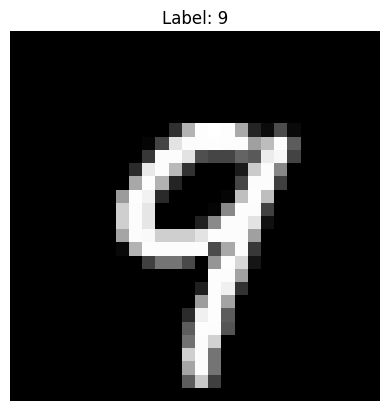

Predicted class: 9


In [ ]:
# load weights and biases from file
file_name = "models/mnist_model_v3_94_30_batched.npz"
data = np.load(file_name)
w = [data[f'weights_{i}'] for i in range(len(w))]
b = [data[f'biases_{i}'] for i in range(len(b))]

# plot a picture of a number
def plot_number(index):
    image = test_X[index].reshape(28, 28)  # reshape the flat array to a 28x28 matrix
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {test_Y_original[index]}")
    plt.axis('off')  # turn off axis labels
    plt.show()


def get_number_prediction(index):
    image = test_X[index:index+1]
    activations = feed_forward_neural_network(image, w, b)
    predictions = softmax(activations[-1])

    predicted_class = np.argmax(predictions, axis=1)[0]
    print(f"Predicted class: {predicted_class}")

    return predicted_class

def predict_index(index=0):
    plot_number(index)
    get_number_prediction(index)

predict_index(12)
